# Task 2 - Prediction using Unsupervised ML

## By - Anupama Nair

### Goal -  From the ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

We shall use K-Means Clustering to solve this problem.

## K-Means Clustering

Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups. K-Means is a very common unsupervised algorithm for clustering.

It is referred to as an unsupervised algorithm because of the **absence of the target variable**.

## Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

## Load the dataset

In [9]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Converting iris into a datadrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Kmeans algorithm is an iterative algorithm that tries to partition the dataset into 'K' pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

## Finding the optimum number of clusters

In [10]:
x = df.iloc[:,[0,1,2,3]].values

Now, we will implement **'The elbow method'** on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification.

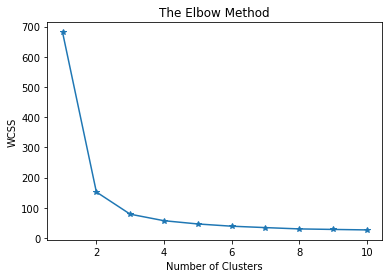

In [24]:
wcss = []  # Within Cluster Sum of Squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, to observe 'The elbow'

plt.plot(range(1,11), wcss, marker='*')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

The name **'elbow method'** signifies that the optimum number of clusters can be found where the elbow occurs. Here, in our graph we can see that the elbow occurs at around **3**. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

So, we pick our number of clusters as **3**.

## Applying K-Means to the iris dataset

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
y_kmeans = kmeans.fit_predict(x)

## Visualising the clusters

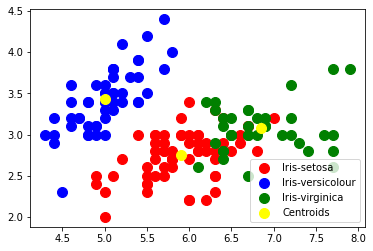

In [14]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

## Predicting the iris flower species

In [16]:
# Defining the target and predictors

X = iris.data[:, :2]
y = iris.target

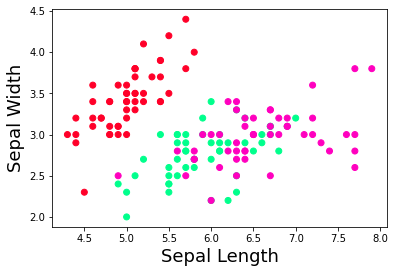

In [19]:
# Visualising X and y

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

## Comparing the actual and predicted data

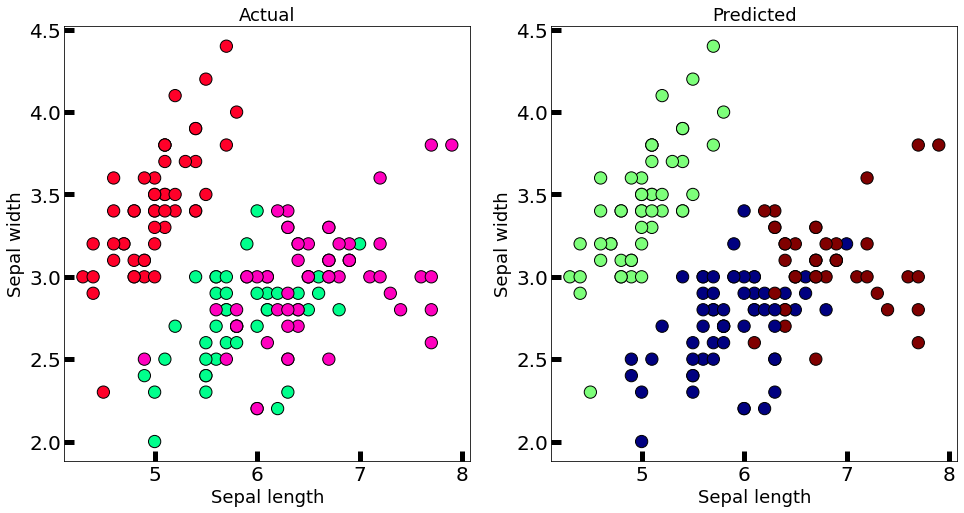

In [22]:
# This will tell us which cluster does the data observations belong to

new_labels = kmeans.labels_

# Plotting the identified clusters and comparing with the results

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
plt.show()